In [1]:
folder=r"D:\SoftwareWebApps\Python\geophysics\inversion&spect_decomp\d11_data\\"
# stream = _read_segy(folder+'cropped_4_spect_decomp.sgy', headonly=True)
import segyio
filename=folder+'cropped_4_spect_decomp.sgy'
# with segyio.open(filename, 'r') as segyfile:
#     ntraces = segyfile.tracecount
#     sr = segyio.tools.dt(segyfile)/1e3
#     nsamples = segyfile.samples.size
#     twt = segyfile.samples
#     ILs=segyfile.ilines
#     XLs=segyfile.xlines
#     data = segyfile.trace.raw[:]
#     size_mb= data.nbytes/1024**2
#     header = segyio.tools.wrap(segyfile.text[0])
# #     print(dir(segyfile),segyfile.ilines,segyfile.xlines)
# print('number of traces: ', ntraces)
# print('number of samples: ', nsamples)
# print('sample rate (ms):  ', sr)
# print('trace length (ms): ', sr * nsamples)
# print('Number of inlines:{} & cross lines: {} '.format(len(ILs), len(XLs)))
# print('size (Mb):         ', size_mb)
# print(data.shape)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr

In [3]:
# data3D = data.reshape((len(ILs), len(XLs), nsamples))
# for il in range(len(ILs)):
#     ildata=data3D[il,:,:].T
#     break

In [4]:
# clip = abs(np.percentile(ildata, 0.999))   # default clip value

# plt.figure(figsize=(10,5))
# plt.imshow(ildata,interpolation='bilinear',aspect='auto',vmin=-clip,vmax=clip,cmap='coolwarm')
# plt.title('{0}'.format(filename))
# plt.ylabel('Samples')
# plt.xlabel('Trace no.')

In [3]:
# print(header)
def read_segy(f, lag=0, twod=False, byte_il=189, byte_xl=193):
    '''
    read_segy (C) aadm 2018 // using Statoil's segyio
    '''
    if twod:
        with segyio.open(filename, 'r', ignore_geometry=True) as segyfile:
            sr = segyio.tools.dt(segyfile)/1e3
            nsamples = segyfile.samples.size
            twt = segyfile.samples
            ntraces = segyfile.tracecount
            data = segyfile.trace.raw[:]
            header = segyio.tools.wrap(segyfile.text[0])      
    else:
        with segyio.open(f, iline=byte_il, xline=byte_xl) as segyfile:
            sr = segyio.tools.dt(segyfile)/1e3
            nsamples = segyfile.samples.size
            twt = segyfile.samples
            ntraces = segyfile.tracecount
            data = segyio.tools.cube(segyfile)
            header = segyio.tools.wrap(segyfile.text[0])  
            inlines = segyfile.ilines
            crosslines = segyfile.xlines
    size_mb= data.nbytes/1024**2
    print('[read_segy] number of traces: {0}, samples: {1}, sample rate: {2} s'.format(ntraces,nsamples,sr))
    print('[read_segy] first, last sample twt: {0}, {1} s'.format(twt[0],twt[-1]))
    print('[read_segy] size: {:.2f} Mb ({:.2f} Gb)'.format(size_mb, size_mb/1024))
    if not twod:
        print('[read_segy] inlines: {:.0f}, min={:.0f}, max={:.0f}'.format(inlines.size,inlines.min(),inlines.max()))
        print('[read_segy] crosslines: {:.0f}, min={:.0f}, max={:.0f}'.format(crosslines.size,crosslines.min(),crosslines.max()))
        return data, nsamples, sr, twt, ntraces, header, inlines, crosslines
    else:
        return data, nsamples, sr, twt, ntraces, header
def plot_seismic(inputseis,twt,name,colr='seismic',clip_val=None):
    ntraces=np.shape(inputseis)[1]
    if clip_val is None:
        clip_val=abs(np.percentile(inputseis, 0.999))   # default clip value
    f, ax = plt.subplots(figsize=(16,6))
    im=ax.imshow(inputseis,interpolation='bilinear',aspect='auto',cmap=colr,extent=(0,ntraces,twt[-1],twt[0]),vmin=-clip_val,vmax=clip_val)
    plt.xlabel('Trace no.'), plt.ylabel('Two-way time [ms]')
    plt.title(name), plt.grid(), plt.colorbar(im)

In [6]:
# dd = (twt>500) & (twt<2500)
# plot_seismic(ildata[dd,:],twt[dd],filename,colr='Greys',clip_val=clip)

In [17]:
filename=folder+'cropped_4_spect_decomp.sgy'
data, nsamples, sr, twt, ntraces, header, inlines, crosslines = read_segy(filename)
# my3d = xr.DataArray(data,[('IL',inlines),('XL',crosslines),('TWT',twt)])

[read_segy] number of traces: 52461, samples: 41, sample rate: 2.0 s
[read_segy] first, last sample twt: 1720.0, 1800.0 s
[read_segy] size: 8.21 Mb (0.01 Gb)
[read_segy] inlines: 261, min=1760, max=2020
[read_segy] crosslines: 201, min=2870, max=3070


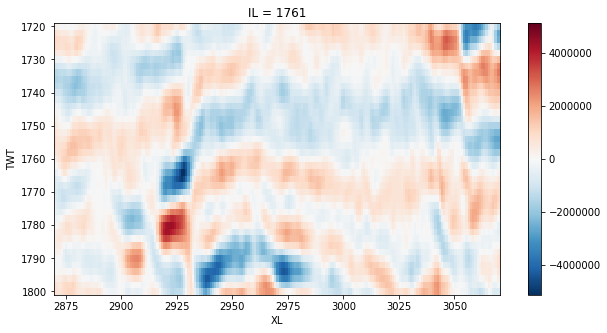

In [15]:
from seis_ampl_spectrum import *
# my3dzoom=my3d.sel(TWT=slice(1720,1800),XL=2870)
# my3dzoom=my3d.sel(IL=1761).data
my3dzoom=my3d.sel(IL=1761)
f, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
uu={'add_colorbar':True,'robust':True,'interpolation':'spline16','cmap':'PiYG'}
# my3dzoom.plot.imshow(x='XL',y='TWT',yincrease=False,ax=ax,**uu)
my3dzoom.plot.imshow(x='XL',y='TWT',yincrease=False,ax=ax)

tr = my3d.sel(IL=1761, XL=2872).data
# f,ax = plt.subplots(2)
# ax[0].plot(tr)
# ax[1].plot(ampspec(tr,sr))

freq peak: 26.51 Hz
freq peak: 26.51 Hz


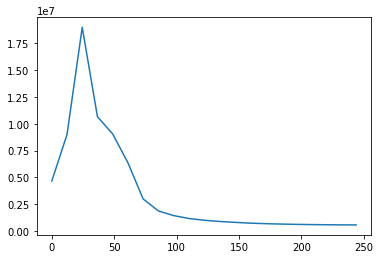

In [16]:
ildata=my3d.sel(IL=1761).data
f,ax = plt.subplots()
ax.plot(fullspec(ildata,sr)[0],fullspec(ildata,sr)[1],label='Near')


freq peak: 26.51 Hz


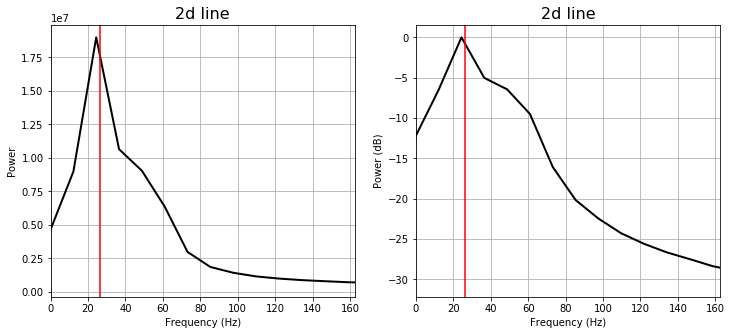

In [8]:
freq,amp,db,fpeak = fullspec(ildata,sr)
plot_ampspec(freq,amp,fpeak,name='2d line')